In [1]:
import pandas as pd
from pandas import DataFrame as DF
import sklearn
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
# Importing all the extracted features.

tch = pd.read_csv('/home/james/anaconda3/data/haralick/tchv.csv')  #Class 1
pach = pd.read_csv('/home/james/anaconda3/data/haralick/pachelbel.csv') # Class 2
schu1 = pd.read_csv('/home/james/anaconda3/data/haralick/schubert1.csv') #Class 3
schu2 = pd.read_csv('/home/james/anaconda3/data/haralick/schubert2.csv')
deb = pd.read_csv('/home/james/anaconda3/data/haralick/debussy.csv') #Class 4
beet1 = pd.read_csv('/home/james/anaconda3/data/haralick/beetnew1.csv') # Class 5
beet2 = pd.read_csv('/home/james/anaconda3/data/haralick/beetnew2.csv')
hand = pd.read_csv('/home/james/anaconda3/data/haralick/handel1.csv') #Class 6
hand2 = pd.read_csv('/home/james/anaconda3/data/haralick/handel2.csv')
moz1 = pd.read_csv('/home/james/anaconda3/data/haralick/moznew1.csv') # Class 7
moz2 = pd.read_csv('/home/james/anaconda3/data/haralick/moznew2.csv')

In [3]:
# Assigning Class Labels.

tch['Composer'] = 1
pach['Composer'] = 2
schu1['Composer'] = 3
schu2['Composer'] = 3
deb['Composer'] = 4
beet1['Composer'] = 5
beet2['Composer'] = 5
hand['Composer'] = 6
hand2['Composer'] = 6
moz1['Composer'] = 7
moz2['Composer'] = 7

In [4]:
# Concatenating the data into single dataframe. 'Data' for modern vs classical, 'Data_mc for multiclass'

data = pd.concat([tch, pach, schu1, schu2, deb], ignore_index=True)
data_mc = pd.concat([tch, pach, schu1, schu2, 
                     deb, beet1, beet2, hand, hand2,moz1, moz2], ignore_index=True)

In [5]:
# Dropping irrelevant cloumns

data.drop(['Identifier', 'Most_Common_Note_Quarter_Length'], axis=1, inplace=True)
data_mc.drop(['Identifier', 'Most_Common_Note_Quarter_Length'], axis=1, inplace=True)

In [6]:
data.head()

,Amount_of_Arpeggiation,Repeated_Notes,Chromatic_Motion,Melodic_Thirds,Melodic_Fifths,Melodic_Tritones,Melodic_Octaves,Initial_Time_Signature_0,Initial_Time_Signature_1,Compound_Or_Simple_Meter,...,Fifths_Pitch_Histogram_5,Fifths_Pitch_Histogram_6,Fifths_Pitch_Histogram_7,Fifths_Pitch_Histogram_8,Fifths_Pitch_Histogram_9,Fifths_Pitch_Histogram_10,Fifths_Pitch_Histogram_11,Unique_Note_Quarter_Lengths,Most_Common_Note_Quarter_Length_Prevalence,Composer
0,0.381379,0.066207,0.239310,0.134483,0.092414,0.069655,0.031034,3,8,0,...,0.599045,0.677804,0.594272,0.281623,0.260143,0.749403,0.298329,8,0.412738,1
1,0.203993,0.016493,0.249132,0.115451,0.021701,0.003472,0.022569,4,4,0,...,0.612546,0.804428,0.584871,0.154982,0.007380,0.070111,0.033210,11,0.535632,1
2,0.309735,0.141593,0.283186,0.079646,0.061947,0.017699,0.008850,2,4,0,...,0.015625,0.281250,0.015625,0.000000,0.187500,0.359375,0.031250,6,0.327485,1
3,0.555556,0.311111,0.111111,0.166667,0.022222,0.000000,0.055556,3,4,0,...,0.000000,0.024561,0.000000,0.336842,0.554386,1.000000,0.284211,5,0.314286,1
4,0.381750,0.045624,0.215084,0.250466,0.039106,0.015829,0.023277,2,4,0,...,0.846734,0.959799,1.000000,0.512563,0.115578,0.070352,0.180905,7,0.295631,1


In [7]:
sixties = pd.read_csv('/home/james/anaconda3/data/haralick/60.csv')
seventies = pd.read_csv('/home/james/anaconda3/data/haralick/70.csv')
eighties = pd.read_csv('/home/james/anaconda3/data/haralick/80.csv')
nineties = pd.read_csv('/home/james/anaconda3/data/haralick/90.csv')

tch2 = pd.read_csv('/home/james/anaconda3/data/haralick/tchv.csv')  
pach2 = pd.read_csv('/home/james/anaconda3/data/haralick/pachelbel.csv') 
schu12 = pd.read_csv('/home/james/anaconda3/data/haralick/schubert1.csv') 
schu22 = pd.read_csv('/home/james/anaconda3/data/haralick/schubert2.csv')
deb2 = pd.read_csv('/home/james/anaconda3/data/haralick/debussy.csv') 

data1 = pd.concat([tch2, pach2, schu12, schu22, deb2], ignore_index=True)
data1['Composer'] = 1

data2 = pd.concat([sixties, seventies, eighties, nineties], ignore_index=True)
data2['Composer'] = 0

data_b = pd.concat([data1,data2], ignore_index=True)
data2.drop(['Identifier', 'Most_Common_Note_Quarter_Length'], axis=1, inplace=True)
data_b.drop(['Identifier', 'Most_Common_Note_Quarter_Length'], axis=1, inplace=True)

data_bm = data_b.as_matrix()

In [8]:
data_mcf = pd.concat([data_mc, data2], ignore_index=True)

In [82]:
# Getting label Counts

for k in range(8):
    print(k, ' : ', data_mcf[data_mcf['Composer']==k].shape)
    
print('')
for k in range(2):
    print(k, ' : ', data_b[data_b['Composer']==k].shape)

0  :  (641, 184)
1  :  (238, 184)
2  :  (183, 184)
3  :  (270, 184)
4  :  (194, 184)
5  :  (247, 184)
6  :  (245, 184)
7  :  (267, 184)

0  :  (641, 184)
1  :  (885, 184)


In [9]:
data_m = data.as_matrix()
data_mcf_m = data_mcf.as_matrix()

In [10]:
import numpy as np
for k in range(1000):
    np.random.shuffle(data_m)
    np.random.shuffle(data_bm)
    np.random.shuffle(data_mcf_m)

In [11]:
X = data_m[:,:-1]
y = data_m[:,-1]
X1 = data_bm[:,:-1]
y1 = data_bm[:,-1]
X_mc = data_mcf_m[:,:-1]
y_mc = data_mcf_m[:,-1]

In [12]:
# GBC classifiers with hyperparameters already tuned.

gbc = GradientBoostingClassifier(learning_rate=0.07, max_depth=5,
                                 n_estimators=400, verbose=0, max_features=.501, random_state=30,
                                 max_leaf_nodes=16)

gbc2 = GradientBoostingClassifier(loss='exponential', learning_rate=0.07, max_depth=5,
                                 n_estimators=400, verbose=0, max_features=.501, random_state=30,
                                 max_leaf_nodes=16)

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score

In [26]:
# Creating Pipelines

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import KernelPCA
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import LogisticRegression

clf_l = LogisticRegression()
clf_r = RidgeClassifier()
clf_s = SVC(kernel='linear')
clf_nn = MLPClassifier(hidden_layer_sizes=(150,100))
standardize = StandardScaler()
kpca = KernelPCA(kernel='poly', n_components=750, degree=5)


svm_p2 = Pipeline([('standardize', standardize), ('kPCA', kpca), ('SVM',clf_s)])
nn_p2 = Pipeline([('standardize', standardize), ('kPCA', kpca), ('MLP', clf_nn)])
log_p1 = Pipeline([('standardize', standardize), ('LogReg',clf_l)])
ridge_p2 = Pipeline([('standardize', standardize), ('kPCA', kpca), ('Ridge', clf_r)])

pipelines = {'SVC p2': svm_p2, 'MLP p2': nn_p2,'GBC': gbc, 'LogReg p1': log_p1, 'Ridge p2': ridge_p2}
pipelines2 = {'SVC p2': svm_p2, 'MLP p2': nn_p2,'GBC': gbc, 'LogReg p1': log_p1, 'Ridge p2': ridge_p2}
scoresMCCV, scoresMCCV2 = {}, {}
for pipe in pipelines:
    scoresMCCV[pipe] = np.zeros(1000)
    scoresMCCV2[pipe] = np.zeros(1000)

In [27]:
# Running Monte-Carlo CV

print('Monte Carlo CV for all pipelnes')
print('training...')
for k in range(1000):
    X_tr, X_ts, y_tr, y_ts = train_test_split(X1,y1,test_size=0.15, random_state=k)
    
    if k % 10 == 0:                  #Printout of time progress
        print(k,' ', end='')
        if k % 100 == 0 and k > 0:
            print('')
    for pipe in pipelines2:
        clsf = pipelines2[pipe]
        clsf.fit(X_tr, y_tr)
        scoresMCCV2[pipe][k] = accuracy_score(y_ts, clsf.predict(X_ts))
    
    
print('')
print('Accuracy Statistics:')

for pipe in pipelines:
    
    print(pipe + ' average score :', 100 *round(scoresMCCV2[pipe].mean(),4), '%')
    print(pipe + ' standard deviation:', 100 *round(scoresMCCV[pipe].std(),4), '%')
    print('Best and Worst Scores:')
    print('Best ' + pipe + ' score : ', 100* round(max(scoresMCCV2[pipe]),4),
          '%. Obtained at Random State : ', np.argmax(scoresMCCV2[pipe]))
    print('Worst' + pipe + 'score : ', 100* round(min(scoresMCCV2[pipe]),4),
          '%. Obtained at Random State : ', np.argmin(scoresMCCV2[pipe]))
    print('')


Monte Carlo CV for all pipelnes
training...
0  10  20  30  40  50  60  70  80  90  100  
110  120  130  140  150  160  170  180  190  200  
210  220  230  240  250  260  270  280  290  300  
310  320  330  340  350  360  370  380  390  400  
410  420  430  440  450  460  470  480  490  500  
510  520  530  540  550  560  570  580  590  600  
610  620  630  640  650  660  670  680  690  700  
710  720  730  740  750  760  770  780  790  800  
810  820  830  840  850  860  870  880  890  900  
910  920  930  940  950  960  970  980  990  
Accuracy Statistics:
SVC p2 average score : 97.77 %
SVC p2 standard deviation: 0.0 %
Best and Worst Scores:
Best SVC p2 score :  100.0 %. Obtained at Random State :  34
WorstSVC p2score :  94.76 %. Obtained at Random State :  156

GBC average score : 98.31 %
GBC standard deviation: 0.0 %
Best and Worst Scores:
Best GBC score :  100.0 %. Obtained at Random State :  4
WorstGBCscore :  95.2 %. Obtained at Random State :  378

LogReg p1 average score : 97.4

In [17]:
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

/home/james/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


[(0.9, 1)]

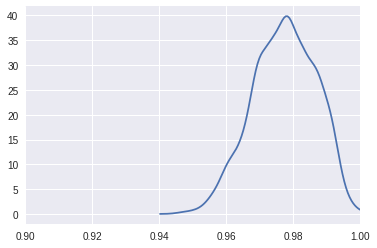

In [203]:
g = sns.kdeplot(scoresMCCV['SVC p2'])
g.set(xlim=(0.9,1))

In [59]:
# Running Monte-Carlo CV


print('Monte Carlo CV for all pipelnes')
print('training...')
for k in range(1000):
    X_tr, X_ts, y_tr, y_ts = train_test_split(X_mc,y_mc,test_size=0.15, random_state=k)
    
    if k % 10 == 0:                  #Printout of time progress
        print(k,' ', end='')
        if k % 100 == 0 and k > 0:
            print('')
    for pipe in pipelines:
        clsf = pipelines[pipe]
        clsf.fit(X_tr, y_tr)
        scoresMCCV[pipe][k] = accuracy_score(y_ts, clsf.predict(X_ts))
    
    
print('')
print('Accuracy Statistics:')

for pipe in pipelines:
    
    print(pipe + ' average score :', 100 *round(scoresMCCV[pipe].mean(),4), '%')
    print(pipe + ' standard deviation:', 100 *round(scoresMCCV[pipe].std(),4), '%')
    print('Best and Worst Scores:')
    print('Best ' + pipe + ' score : ', 100* round(max(scoresMCCV[pipe]),4),
          '%. Obtained at Random State : ', np.argmax(scoresMCCV[pipe]))
    print('Worst' + pipe + 'score : ', 100* round(min(scoresMCCV[pipe]),4),
          '%. Obtained at Random State : ', np.argmin(scoresMCCV[pipe]))
    print('')


Monte Carlo CV for all pipelnes
training...
0  10  20  30  40  50  60  70  80  90  100  
110  120  130  140  150  160  170  180  190  200  
210  220  230  240  250  260  270  280  290  300  
310  320  330  340  350  360  370  380  390  400  
410  420  430  440  450  460  470  480  490  500  
510  520  530  540  550  560  570  580  590  600  
610  620  630  640  650  660  670  680  690  700  
710  720  730  740  750  760  770  780  790  800  
810  820  830  840  850  860  870  880  890  900  
910  920  930  940  950  960  970  980  990  
Accuracy Statistics:
SVC p2 average score : 83.74 %
SVC p2 standard deviation: 1.97 %
Best and Worst Scores:
Best SVC p2 score :  89.8 %. Obtained at Random State :  544
WorstSVC p2score :  78.13 %. Obtained at Random State :  162

GBC average score : 87.53 %
GBC standard deviation: 1.74 %
Best and Worst Scores:
Best GBC score :  92.71 %. Obtained at Random State :  379
WorstGBCscore :  82.51 %. Obtained at Random State :  606

LogReg p1 average score :

In [29]:
pipe_names = sorted(list(pipelines2))
bst, wst, avg, std = [], [], [], []
for pipe in pipe_names:
    bst.append(str(100 *round(scoresMCCV2[pipe].max(),4))+'%')
    wst.append(str(100 *round(scoresMCCV2[pipe].min(),4))+'%')
    avg.append(str(100 *round(scoresMCCV2[pipe].mean(),4))+'%')
    std.append(str(100 *round(scoresMCCV2[pipe].std(),4))+'%')
    
res_df = pd.DataFrame(pd.Series(bst))
res_df.columns = ['Best Score']
res_df.index = pipe_names
res_df['Worst Score'] = wst
res_df['Average Score'] = avg
res_df['Standard Dev.'] = std
res_df.columns.name = 'Performance'
res_df.sort_values(by='Average Score',ascending=0)

Performance,Best Score,Worst Score,Average Score,Standard Dev.
GBC,100.0%,95.2%,98.31%,0.86%
MLP p2,100.0%,94.76%,97.82%,0.92%
SVC p2,100.0%,94.76%,97.77%,0.93%
Ridge p2,100.0%,94.32%,97.74%,0.93%
LogReg p1,100.0%,93.89%,97.43%,0.98%


In [60]:
pipe_names = sorted(list(pipelines))
bst, wst, avg, std = [], [], [], []
for pipe in pipe_names:
    bst.append(str(100 *round(scoresMCCV[pipe].max(),4))+'%')
    wst.append(str(100 *round(scoresMCCV[pipe].min(),4))+'%')
    avg.append(str(100 *round(scoresMCCV[pipe].mean(),4))+'%')
    std.append(str(100 *round(scoresMCCV[pipe].std(),4))+'%')
    
res_df = pd.DataFrame(pd.Series(bst))
res_df.columns = ['Best Score']
res_df.index = pipe_names
res_df['Worst Score'] = wst
res_df['Average Score'] = avg
res_df['Standard Dev.'] = std
res_df.columns.name = 'Performance'
res_df.sort_values(by='Average Score',ascending=0)

Performance,Best Score,Worst Score,Average Score,Standard Dev.
GBC,92.71%,82.51%,87.53%,1.74%
MLP p2,90.09%,77.55%,83.76%,2.02%
SVC p2,89.8%,78.13%,83.74%,1.97%
Ridge p2,88.34%,76.38%,82.77%,1.94%
LogReg p1,87.17%,76.09%,81.82%,1.96%


In [36]:
def get_conf_matrix(rand_state, clf, clf_name):
    X_tr, X_ts, y_tr, y_ts = train_test_split(X1,y1,test_size=0.15, random_state=rand_state)
    clf.fit(X_tr, y_tr)
    df = pd.DataFrame(confusion_matrix(y_ts, clf.predict(X_ts)))
    df.columns = ['Predicted Modern', 'Predicted Classical']
    df.columns.name = clf_name
    df.index = ['True Modern', 'True Classiscal']
    cmap = sns.light_palette((137, 85, 74), input="husl",as_cmap=True)
    
    
    
    
    return sns.heatmap(df,annot=True, fmt='d', cbar=0, cmap=cmap, annot_kws={"size": 20})

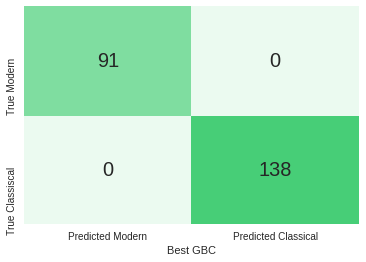

In [37]:
get_conf_matrix(4,gbc2,'Best GBC')

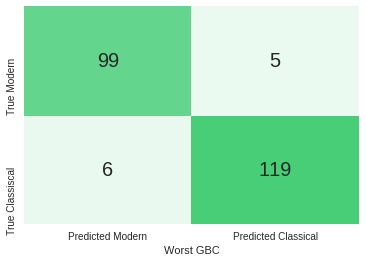

In [47]:
get_conf_matrix(378,gbc,'Worst GBC')

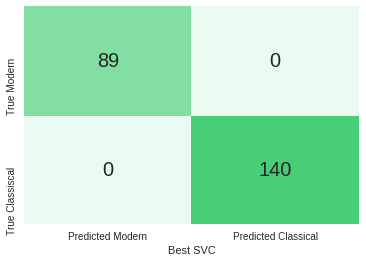

In [39]:
get_conf_matrix(34,svm_p2,'Best SVC')

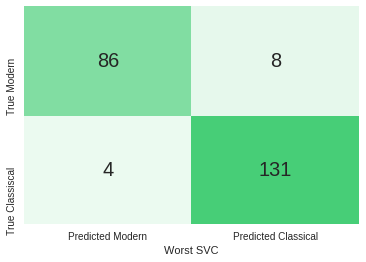

In [41]:
get_conf_matrix(156,svm_p2,'Worst SVC')

/home/james/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


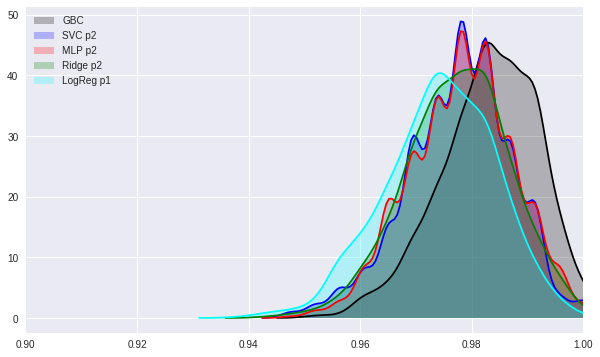

In [58]:
plt.figure(figsize=(10,6))
g = sns.kdeplot(scoresMCCV2['GBC'],shade=True, color='black')
sns.kdeplot(scoresMCCV2['SVC p2'],shade=True, color='blue',)
sns.kdeplot(scoresMCCV2['MLP p2'],shade=True, color='red')
sns.kdeplot(scoresMCCV2['Ridge p2'],shade=True, color='green')
sns.kdeplot(scoresMCCV2['LogReg p1'],shade=True, color='cyan')
g.set(xlim=(0.9,1))
g.legend(['GBC','SVC p2', 'MLP p2', 'Ridge p2', 'LogReg p1'], loc=2)

/home/james/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


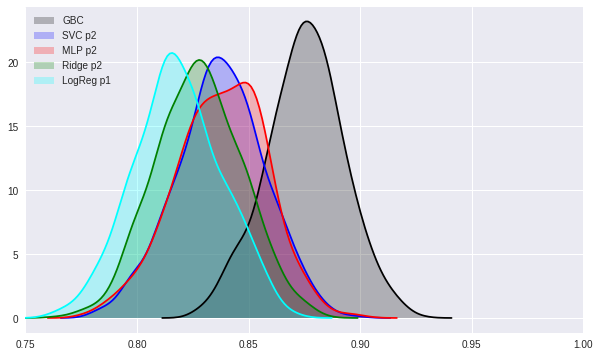

In [61]:
plt.figure(figsize=(10,6))
g = sns.kdeplot(scoresMCCV['GBC'],shade=True, color='black')
sns.kdeplot(scoresMCCV['SVC p2'],shade=True, color='blue',)
sns.kdeplot(scoresMCCV['MLP p2'],shade=True, color='red')
sns.kdeplot(scoresMCCV['Ridge p2'],shade=True, color='green')
sns.kdeplot(scoresMCCV['LogReg p1'],shade=True, color='cyan')
g.set(xlim=(0.75,1))
g.legend(['GBC','SVC p2', 'MLP p2', 'Ridge p2', 'LogReg p1'], loc=2)

SVC p2 average score : 83.74 %
SVC p2 standard deviation: 1.97 %
Best and Worst Scores:
Best SVC p2 score :  89.8 %. Obtained at Random State :  544
WorstSVC p2score :  78.13 %. Obtained at Random State :  162

GBC average score : 87.53 %
GBC standard deviation: 1.74 %
Best and Worst Scores:
Best GBC score :  92.71 %. Obtained at Random State :  379
WorstGBCscore :  82.51 %. Obtained at Random State :  606

LogReg p1 average score : 81.82 %
LogReg p1 standard deviation: 1.96 %
Best and Worst Scores:
Best LogReg p1 score :  87.17 %. Obtained at Random State :  710
WorstLogReg p1score :  76.09 %. Obtained at Random State :  792

MLP p2 average score : 83.76 %
MLP p2 standard deviation: 2.02 %
Best and Worst Scores:
Best MLP p2 score :  90.09 %. Obtained at Random State :  154
WorstMLP p2score :  77.55 %. Obtained at Random State :  792

Ridge p2 average score : 82.77 %
Ridge p2 standard deviation: 1.94 %
Best and Worst Scores:
Best Ridge p2 score :  88.34 %. Obtained at Random State :  949
WorstRidge p2score :  76.38 %. Obtained at Random State :  898

In [68]:
def get_conf_matrix3(rand_state, clf, clf_name):
    X_tr, X_ts, y_tr, y_ts = train_test_split(X_mc,y_mc,test_size=0.15, random_state=rand_state)
    clf.fit(X_tr, y_tr)
    df = pd.DataFrame(confusion_matrix(y_ts, clf.predict(X_ts)))
    df.columns = ['Predicted Modern','Predicted Tchaichovsky', 'Predicted Pachelbel',
                  'Predicted Schubert','Predicted Debussy', 'Predicted Beethoven', 
                  'Predicted Handel','Predicted Mozart']
    df.columns.name = clf_name
    df.index = ['True Modern', 'True Tchaichovsky', 'True Pachelbel',
                'True Schubert','True Debussy', 'True Beethoven', 
                'True Handel','True Mozart']
    cmap = sns.light_palette((7, 97, 50), input="husl",as_cmap=True)
    
    
    
    
    return sns.heatmap(df,annot=True, fmt='d', cbar=0, cmap=cmap, annot_kws={"size": 20})

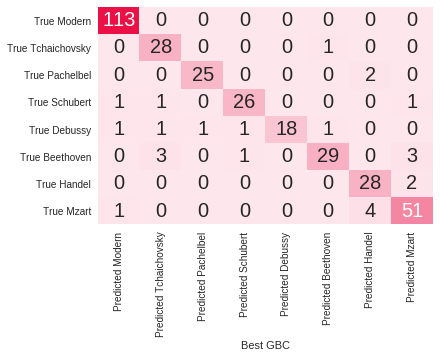

In [71]:
get_conf_matrix3(379, gbc, 'Best GBC')

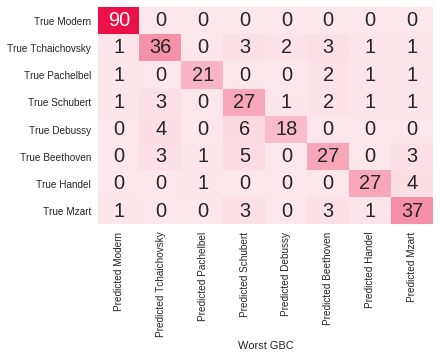

In [72]:
get_conf_matrix3(606, gbc, 'Worst GBC')

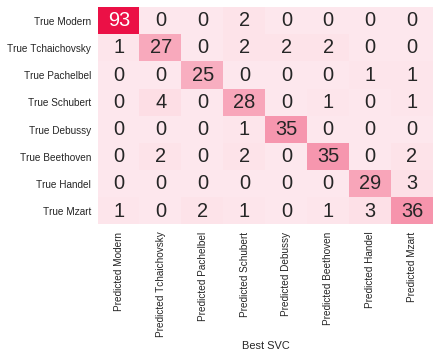

In [73]:
get_conf_matrix3(544, svm_p2, 'Best SVC')

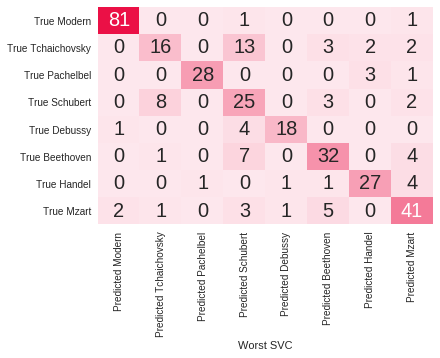

In [75]:
get_conf_matrix3(162, svm_p2, 'Worst SVC')